In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
import requests 
from bs4 import BeautifulSoup
wikiurl='https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'
table_class='wikitable sortable jquery-tablesorter'

response=requests.get(wikiurl)
#status 200: The server successfully answered the http request 
print(response.status_code)

200


In [5]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})

df2018 = pd.read_html(str(table))[0]


In [12]:
df2018.head()

Country[19] Fossil CO2 emissions(Mt CO2)             \
                      Country[19]                         1990       2005   
0                           World                    22674.116  30049.809   
1  World – International Aviation                      258.941    422.777   
2  World – International Shipping                      371.804    572.169   
3                     Afghanistan                        2.546      1.063   
4                         Albania                        6.583      4.196   

                        Fossil CO2 emissions                           \
        2017       2021     2017(% of world) 2017 vs 1990: change (%)   
0  37077.404  37857.580              100.00%                    63.5%   
1    543.381        NaN                1.47%                   109.8%   
2    677.248        NaN                1.83%                    82.2%   
3     11.422       8.35                0.03%                   348.6%   
4      5.026       4.59                0.01%                   -23.7%   

  2017 – Fossil CO2 emissions                           \
  Per land area(t CO2/km2/yr) Per capita(t CO2/cap/yr)   
0                        73.0                      4.9   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                        18.0                      0.3   
4                       175.0                      1.7   

    2018 CO2 emissions[20]                           
  Total including LUCF[21] Total excluding LUCF[22]  
0                 36431.11                 35247.21  
1                      NaN                      NaN  
2                      NaN                      NaN  
3                     7.59                     7.44  
4                     5.32                     5.56

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
#get lists of data
emi_ = df2018[('2018 CO2 emissions[20]', 'Total excluding LUCF[22]')]
country_ = list(df2018[('Country[19]', 'Country[19]')])
country_mod = [i.replace('\xa0',' ') for i in country_]

#create a DataFrame
df = pd.DataFrame(zip(country_mod,emi_), columns = ['countries', 'emission_2018'])
#remove the row of country that cannot be converted
df = df[df['countries']!='Serbia & Montenegro']  
df = df[df['emission_2018'].apply(is_float)]

In [42]:
df.iloc[:,1] = df.iloc[:,1].astype('float')
df = df[(df['emission_2018']>200) & (df['emission_2018']<1000)]
df['percentage'] = [i*100/sum(df['emission_2018']) for i in df['emission_2018']]

C:\Users\Asus\AppData\Local\Temp\ipykernel_35688\698576478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1] = df.iloc[:,1].astype('float')


In [46]:
df_s = df.sort_values(by='emission_2018', ascending=False)

## plot diagram

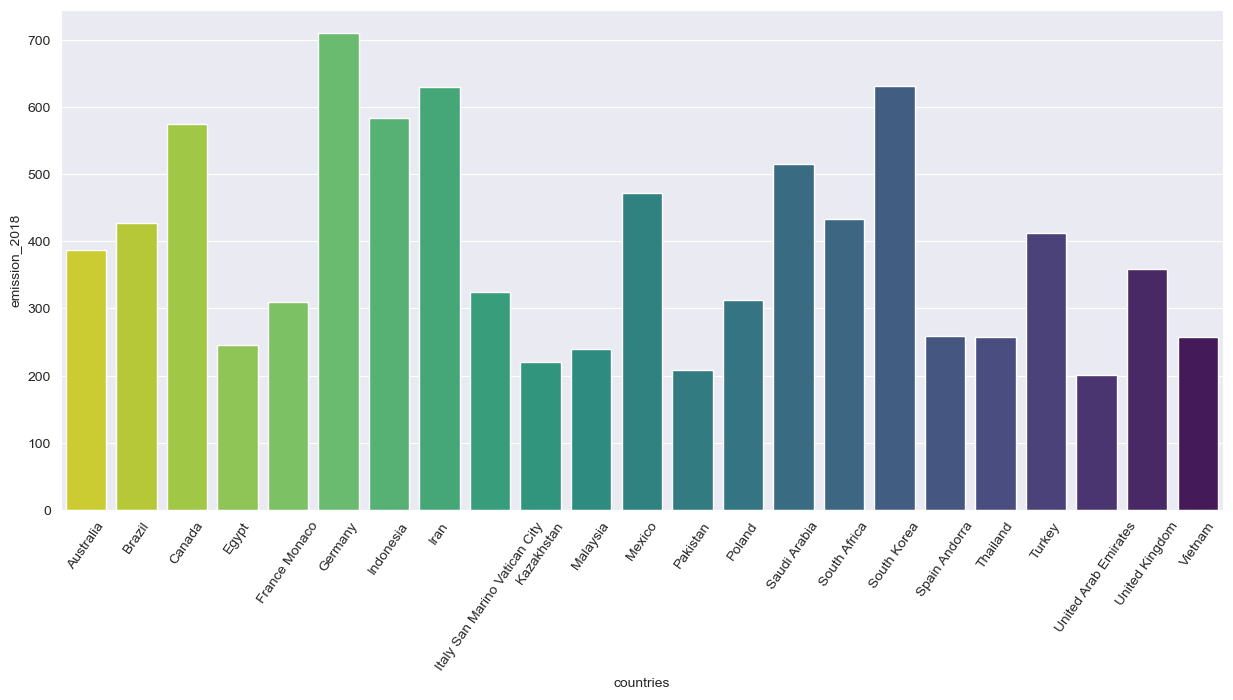

In [49]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=df, x='countries', y='emission_2018',
                ci=False, palette='viridis_r')
g.set_xticklabels(df['countries'], rotation=55, fontdict={'fontsize':10})
plt.show()

In [53]:
## extract a list of colors for later use with each visualization.
def get_color(name, number):
    pal = list(sns.color_palette(palette=name,n_colors=number))
    return pal

In [55]:
pal_vi = get_color('viridis_r', len(df))
pal_plas = get_color('plasma_r', len(df))
pal_spec = get_color('Spectral', len(df))
pal_hsv = get_color('hsv', len(df))

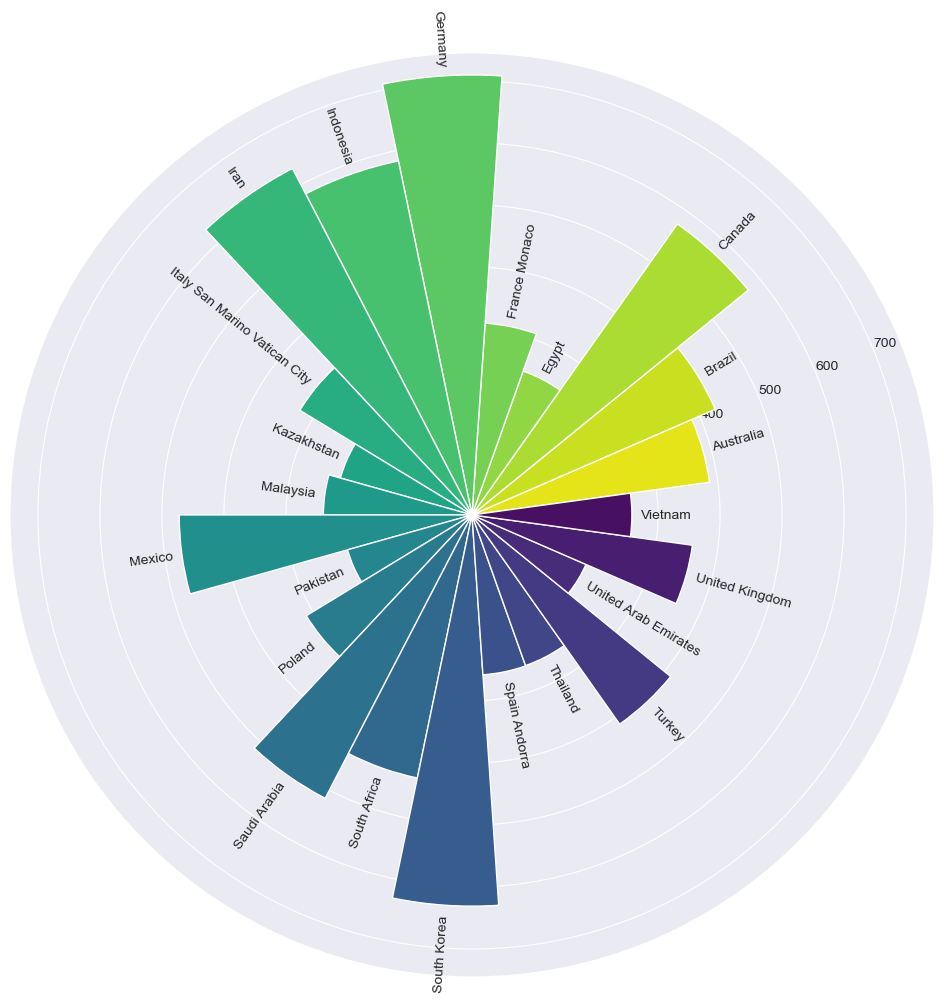

In [95]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df['emission_2018'].max()

#set heights and width
height = df['emission_2018']
width = 2*np.pi / len(df.index)

#set index and angle
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_vi)
labelPadding = 15
for bar, angle, height, label in zip(bars,angles, heights, df['countries']):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle<= 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([],labels=[])
    
plt.show()

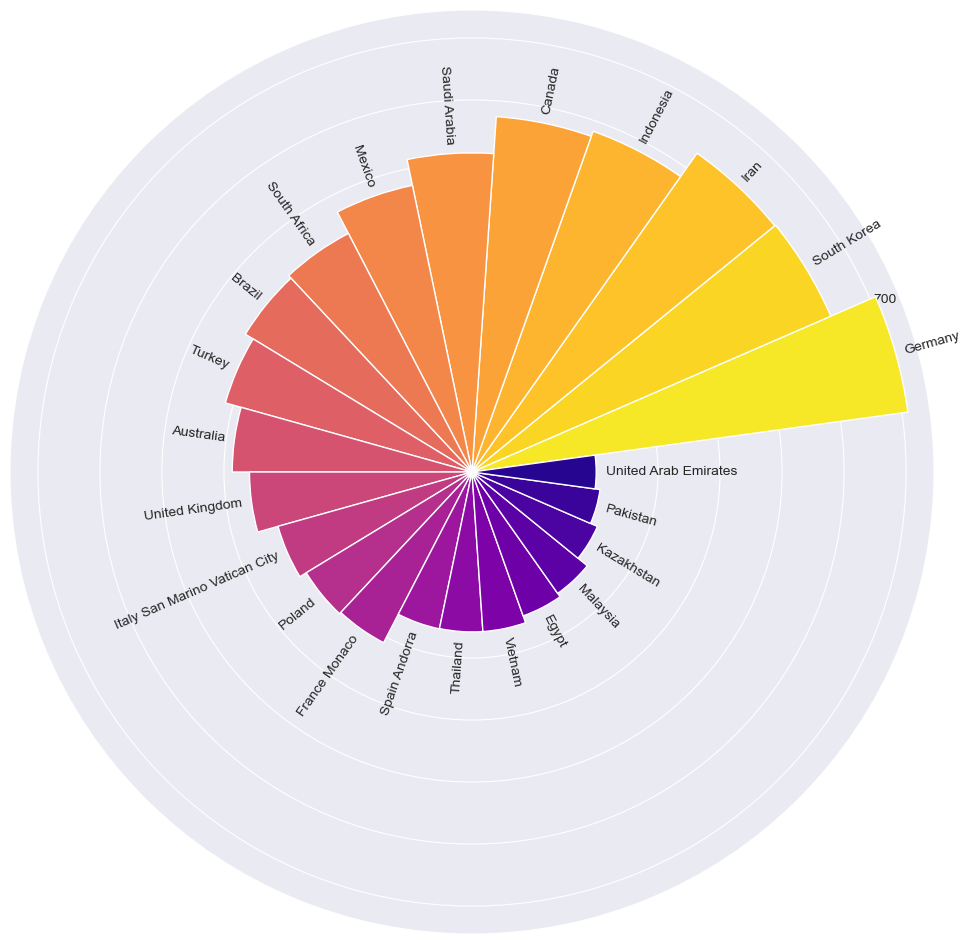

In [96]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df_s['emission_2018'].max()

#set heights and width
heights = df_s['emission_2018']
width = 2*np.pi / len(df_s.index)

#set index and angle
indexes = list(range(1, len(df_s.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_plas)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df_s['countries']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

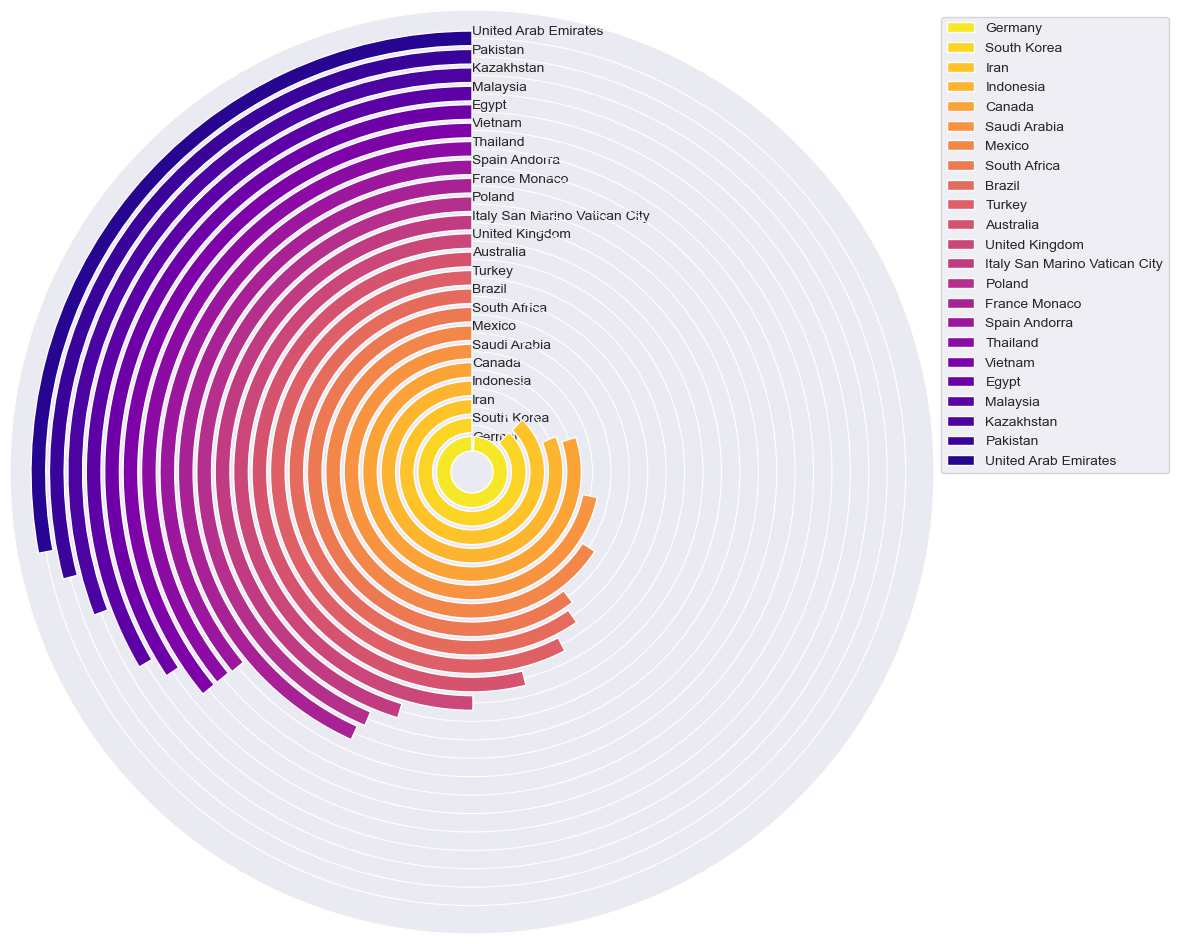

In [110]:
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df_s['emission_2018'])*1.01
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df_s['emission_2018'])[i]*2*np.pi/max_val,
            label=list(df_s['countries'])[i], color=pal_plas[i])

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df_s['countries'])

#set the projection
ax = plt.subplot(projection='polar')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

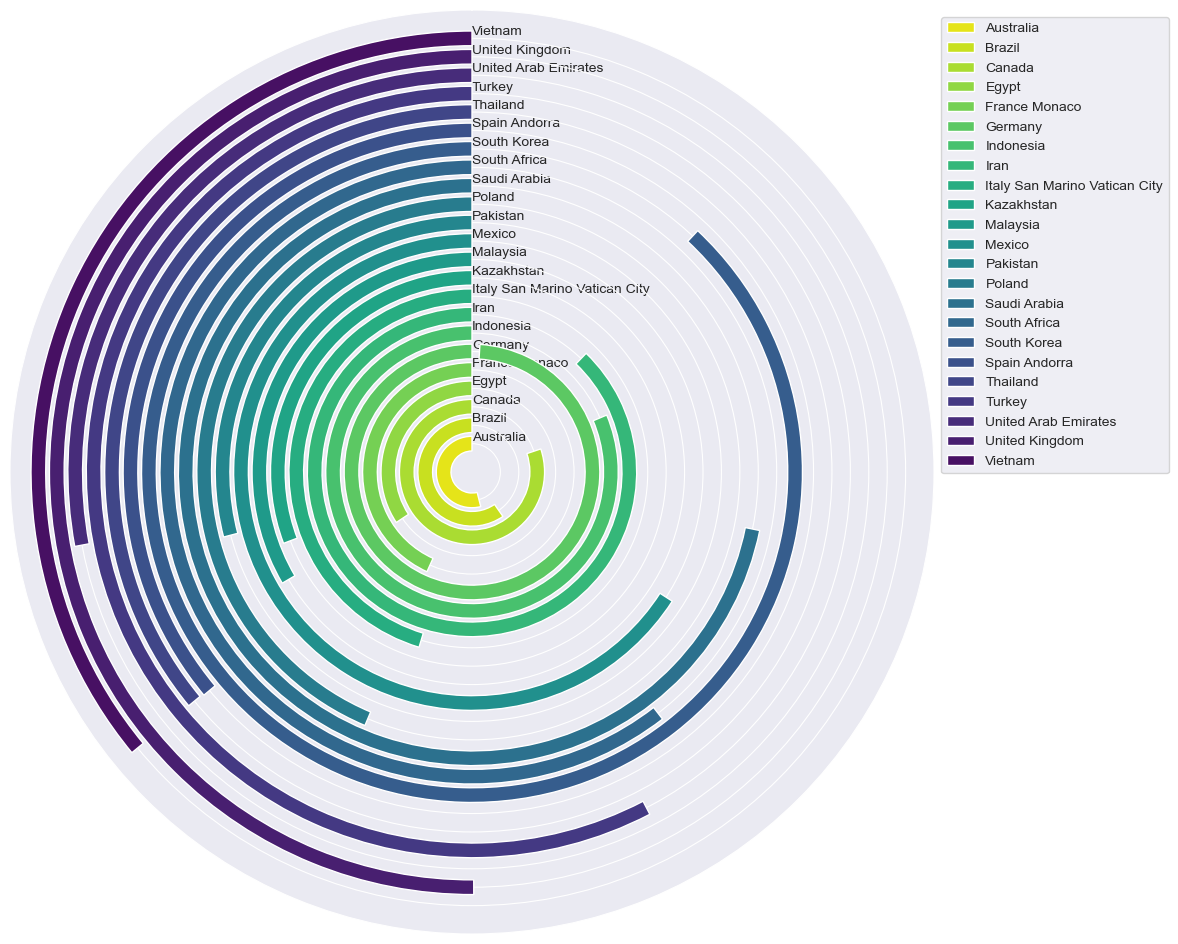

In [103]:
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df['emission_2018'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df['countries'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df['emission_2018'])[i]*2*np.pi/max_val,
            label=list(df['countries'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()